Import all necessary packages

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import json
import os
import matplotlib.pyplot as plt
import re
import string
import time
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem import PorterStemmer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Pre-processing Steps

In [2]:
# import data
df = pd.read_csv('/work/data/reviews_authors_genres.csv')
df.head(20)

,Unnamed: 0,book_id,review_text,rating,sentiment,language_code,authors,author_id,author_names,genres
0,0,1323657,So the low rating on this one is primarily bec...,2,bad,NaN,NaN,NaN,NaN,NaN
1,1,27276325,Find all of my reviews at: http://52bookminimu...,2,bad,NaN,NaN,NaN,NaN,NaN
2,2,22360786,Meh. Not for me. I don't really like historica...,1,bad,NaN,NaN,NaN,NaN,NaN
3,3,6393972,This series progressively got worse with each ...,1,bad,NaN,NaN,NaN,NaN,NaN
4,4,18692115,"llG@ jyd@, ltshbyht m`br@, lqS@ mtkrr@, w lbd ...",1,bad,NaN,NaN,NaN,NaN,NaN
5,5,481743,The real problem here is pacing. How are we su...,2,bad,NaN,NaN,NaN,NaN,NaN
6,6,16152306,"kebiasaan tiap bosen, capek, mumet, jenuh, sam...",2,bad,ind,"[{'author_id': '4652398', 'role': ''}]",['4652398'],['Pricillia A.W.'],"['young-adult', 'romance', 'fiction']"
7,7,27208844,"The story was there, but I just didn't feel th...",2,bad,NaN,"[{'author_id': '6526309', 'role': ''}]",['6526309'],['L.P. Dover'],"['romance', 'mystery, thriller, crime']"
8,8,1786459,"One snowy day an elderly woman, Sarah, watches...",0,bad,NaN,NaN,NaN,NaN,NaN
9,9,22729321,Lacks depth. \n Main character Alexa isn't any...,2,bad,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = df.copy()
#drop na's from the dataframe.
df2.dropna(inplace=True)

#check to see if all null values were removed.
df2.isnull().sum()

Unnamed: 0       0
book_id          0
review_text      0
rating           0
sentiment        0
language_code    0
authors          0
author_id        0
author_names     0
genres           0
dtype: int64

In [4]:
# Let's focus only on the review_text, rating, and language for now
df_reviews = df2[['review_text','rating','sentiment','language_code']]
df_reviews.reset_index(drop=True)

,review_text,rating,sentiment,language_code
0,"kebiasaan tiap bosen, capek, mumet, jenuh, sam...",2,bad,ind
1,This has got to be the most ridiculous book I ...,1,bad,eng
2,Cal is a lust demon. He is has been around for...,2,bad,eng
3,Great book!,0,bad,en-GB
4,Didn't grab my attention. May pick it back up ...,0,bad,en-US
...,...,...,...,...
125188,Not sure what it is about this book but it too...,3,neutral,en-GB
125189,"dhkryt\mdhkrt wHd mn shyTyn lsh`r lmSr~ l`Zm,`...",3,neutral,ara
125190,dywn ldhydh w mkhtlf `n 'y sh`r qryth qbl kdh ...,3,neutral,ara
125191,This is another Blake with waaay too much sex....,3,neutral,en-US


In [5]:
# filter reviews that are only in English
eng_lst = ['eng','en-US','en-GB','en-CA']

lang_filt = df_reviews['language_code'].isin(eng_lst)

df_reviews = df_reviews[lang_filt]

df_reviews.reset_index(drop=True)

df_reviews = df_reviews.sample(n=50000)

df_reviews = df_reviews.reset_index(drop=True)
df_reviews

,review_text,rating,sentiment,language_code
0,Project Gutenberg is my fave place for OOP and...,5,good,eng
1,"No offense to anyone named Charmaine or Stan, ...",3,neutral,eng
2,Yet another great read. These books are great.,5,good,en-GB
3,I enjoyed Duhigg's perspective. He states the ...,4,good,eng
4,Little children love this book.,3,neutral,eng
...,...,...,...,...
49995,"Yeah, it's another vampire novel. In all fairn...",0,bad,eng
49996,"An amazing book that everyone should, giving a...",3,neutral,en-US
49997,It wasn't until the beginning of this year tha...,4,good,eng
49998,"A set of short stories. Some are fantasy, some...",2,bad,eng


In [6]:
#A contractions dictionary from Wikipedia found on Stack Overflow for expanding contractions: 
#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [7]:
import re

#This code is code to expand contractions in text created by Abhishek Sharma:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

#Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df_reviews['review_text']=df_reviews['review_text'].apply(lambda x:expand_contractions(x))

In [8]:
#make all reviews lowercase.
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: x.lower())

In [9]:
#check text after expanding contractions and lowercasing all words.
df_reviews['review_text'].unique()[0]

"project gutenberg is my fave place for oop and public domain books. i adore wodehouse, and who can forget our beloved gentleman's personal gentleman, jeeves, who ever comes to the rescue when the hapless bertie wooster falls into trouble. pithy buffoonery, moronic misunderstandings, gaffes, and aristocratic slapstick. \n it reads considerably more satirically now than it probably did in the heydays of 1919...but it has not lost a bit of its humor."

In [10]:
#removing digits and words that contain digits because the numbers don't have much weight importance.
df_reviews['review_text']=df_reviews['review_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [11]:
import string

#This code is code to expand contractions in text created by Abhishek Sharma:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
df_reviews['review_text']=df_reviews['review_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#removing all newline '\n' characters
df_reviews = df_reviews.replace(r'\n',' ', regex=True) 

#removing all excess space.
df_reviews['review_text']=df_reviews['review_text'].apply(lambda x: re.sub('\s+',' ',x))


#Let's take another look at the text.
df_reviews['review_text'].unique()[0]

'project gutenberg is my fave place for oop and public domain books i adore wodehouse and who can forget our beloved gentlemans personal gentleman jeeves who ever comes to the rescue when the hapless bertie wooster falls into trouble pithy buffoonery moronic misunderstandings gaffes and aristocratic slapstick it reads considerably more satirically now than it probably did in the heydays of but it has not lost a bit of its humor'

<AxesSubplot:>

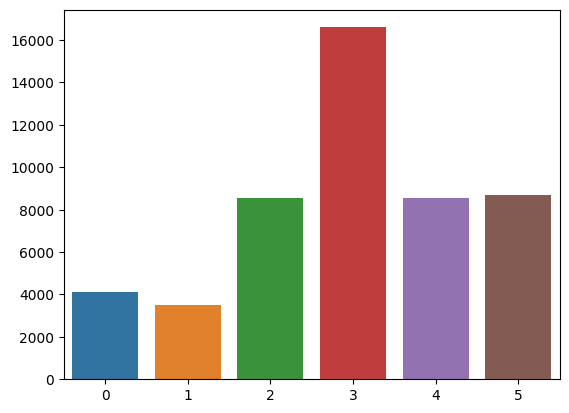

In [12]:
# get the rating distribution

rate_cnt = df_reviews['rating'].value_counts()
rate_cnt = rate_cnt.sort_index()

x=rate_cnt.index
y=rate_cnt.values

sns.barplot(x=x,y=y)
# more ratings for 4 and 5... 

In [13]:
# let's treat 4 and 5 as positive reviews (good) and 1 and 2 as negative reviews (bad). 
# We will remove take 3 (neutral) reviews out

df_reviews = df_reviews[df_reviews.rating != 3]
pd.set_option('mode.chained_assignment',None)
df_reviews['labels'] = df_reviews['rating'].apply(lambda x:1 if x < 3 else 0) # Pos is 0 , neg is 1
df_reviews = df_reviews.drop(["rating","sentiment","language_code"],axis=1)

df_reviews.head()

,review_text,labels
0,project gutenberg is my fave place for oop and...,0
2,yet another great read these books are great,0
3,i enjoyed duhiggs perspective he states the re...,0
5,i cannot say that i liked this story it was ov...,1
7,the first of her historical novels i read it w...,0


<AxesSubplot:>

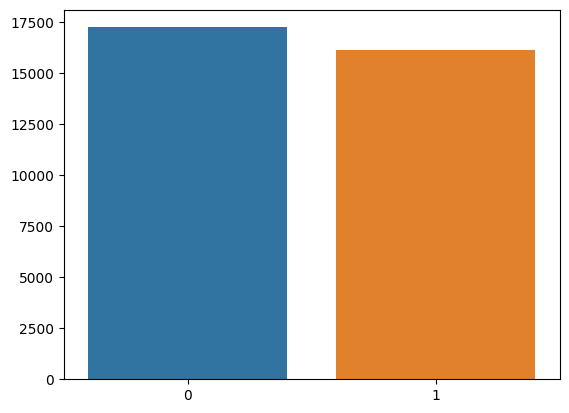

In [14]:
# getting the class dist

label_cnt = df_reviews['labels'].value_counts()
label_cnt = label_cnt.sort_index()

sns.barplot(x=label_cnt.index, y=label_cnt.values)

In [15]:
# find baseline model
# baseline model can be one that simply labels every review as Class 0

print("{:.2f}".format(df_reviews[df_reviews.labels == 0].shape[0]/df_reviews.shape[0]))



0.52


# Logistic Regression

In [16]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [17]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [18]:
#create stopwords and lemmatizer.
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [19]:
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence)  
    clean_tokens = [w for w in word_tokens if not w in stop_words]  
    
    return clean_tokens

df_reviews['review_text'] = df_reviews['review_text'].apply(remove_stopwords)


df_reviews

,review_text,labels
0,"[project, gutenberg, fave, place, oop, public,...",0
2,"[yet, another, great, read, books, great]",0
3,"[enjoyed, duhiggs, perspective, states, real, ...",0
5,"[say, liked, story, overly, religious, struggl...",1
7,"[first, historical, novels, read, better, scie...",0
...,...,...
49993,"[yessssssssssssssssssss, sigh]",0
49994,"[review, httpalwayslostinbookswordpressco]",1
49995,"[yeah, another, vampire, novel, fairness, thou...",1
49997,"[beginning, year, introduced, wonder, kl, gray...",0


In [20]:
# stem words since lemmatization is taking longer
# 
df_reviews['review_text_stemmed'] = df_reviews['review_text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df_reviews = df_reviews.drop(columns=['review_text']) # Get rid of the unstemmed column.
df_reviews 

,labels,review_text_stemmed
0,0,"[project, gutenberg, fave, place, oop, public,..."
2,0,"[yet, anoth, great, read, book, great]"
3,0,"[enjoy, duhigg, perspect, state, real, power, ..."
5,1,"[say, like, stori, over, religi, struggl, conn..."
7,0,"[first, histor, novel, read, better, scienc, f..."
...,...,...
49993,0,"[yessssssssssssssssssss, sigh]"
49994,1,"[review, httpalwayslostinbookswordpressco]"
49995,1,"[yeah, anoth, vampir, novel, fair, though, lov..."
49997,0,"[begin, year, introduc, wonder, kl, grayson, w..."


In [21]:
# join the words from list to figure out feature importance later on
df_reviews['review_text'] = [','.join(map(str, l)) for l in df_reviews['review_text_stemmed']]
df_reviews = df_reviews.drop(columns=['review_text_stemmed']) # drop column in list
df_reviews

,labels,review_text
0,0,"project,gutenberg,fave,place,oop,public,domain..."
2,0,"yet,anoth,great,read,book,great"
3,0,"enjoy,duhigg,perspect,state,real,power,habit,i..."
5,1,"say,like,stori,over,religi,struggl,connect,mai..."
7,0,"first,histor,novel,read,better,scienc,fiction,..."
...,...,...
49993,0,"yessssssssssssssssssss,sigh"
49994,1,"review,httpalwayslostinbookswordpressco"
49995,1,"yeah,anoth,vampir,novel,fair,though,love,urban..."
49997,0,"begin,year,introduc,wonder,kl,grayson,write,fo..."


In [22]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_reviews,test_size=0.3,stratify=df_reviews['labels'],random_state=42)
train

,labels,review_text
43891,1,"arc,provid,publish,netgalley,grip,intens,previ..."
5726,1,"steampunki,good,steampunk,aspect,seem,wallpap,..."
40480,0,"found,book,read,review,opportun,boy,glad,book,..."
28657,0,"clever,keep,guess,buy,borrow,itbut,read"
18951,0,"unexpect,raunchi,novel,easili,shock,bewar"
...,...,...
19488,0,"love,read,hawk,jase,cours"
1840,1,"hung,disappoint,unclimact,end"
7998,1,"care,book,mrs,bird,one,bossi,ladi,rather,rude,..."
10628,0,"ador,book,review,come"


In [23]:
import time
from sklearn.feature_extraction.text import CountVectorizer
start = time.time()
cv = CountVectorizer(binary=True, min_df=10,max_df=0.95)
cv.fit_transform(train['review_text'].values)

train_ft_set = cv.transform(train['review_text'].values)
test_ft_set = cv.transform(test['review_text'].values)

print("Time took to convert text into vector: ", round((time.time() - start)/60,2), " mins")

Time took to convert text into vector:  0.05  mins


In [24]:
train_ft_set.shape[1]

7321

In [25]:
cv.vocabulary_['love']

3882

In [26]:
list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(1234)]

'comfort'

In [27]:
y_train = train['labels'].values
y_test = test['labels'].values

In [28]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
lr = LogisticRegression(random_state = 42, max_iter=400)
lr.fit(train_ft_set,y_train)
y_pred = lr.predict(test_ft_set)
print("Time took to train and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

Time took to train and make predictions:  0.02  mins


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("Accuracy: ",round(accuracy_score(y_test,y_pred),3))
print("F1: ",round(f1_score(y_test, y_pred),3))

Accuracy:  0.787
F1:  0.78


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


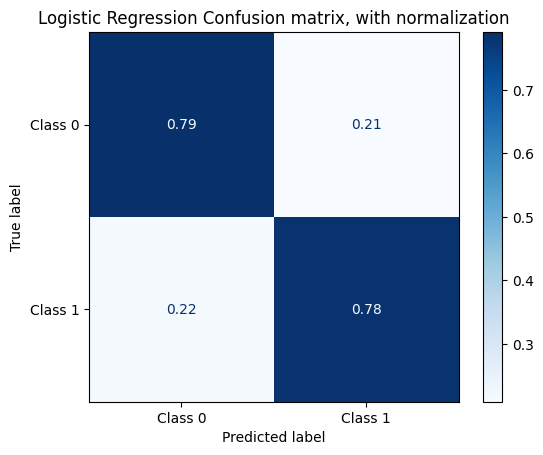

In [30]:
from sklearn import metrics

conf_mat = metrics.plot_confusion_matrix(lr, test_ft_set, y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
conf_mat.ax_.set_title('Logistic Regression Confusion matrix, with normalization');

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# use Kfold model to test model accuracy 
kfold = KFold(n_splits=10)
results = cross_val_score(lr, cv.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')

print("Accuracy from each of 10 folds: ", results)
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy from each of 10 folds:  [0.79550898 0.78263473 0.80928144 0.79131737 0.78742515 0.7933513
 0.78227014 0.79275232 0.79395028 0.79454927]
Mean Accuracy: 79.230%, Standard Deviation: (0.726%)


Hyperparameter Tuning

Check for other parameters that might have a better accuracy

In [32]:
values = [.01, .1, 1, 10]
for val in values:
  kfold = KFold(n_splits=10) 
  lr_1 = LogisticRegression(C=val, random_state=42, max_iter = 2500) 
  results = cross_val_score(lr_1, cv.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')
  print("C Value :", val, 
        "Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % 
        (results.mean()*100.0, results.std()*100.0))

#  seems like the best accuracy is from C = 0.1


C Value : 0.01 Mean Accuracy: 79.045%, Standard Deviation: (1.015%)
C Value : 0.1 Mean Accuracy: 80.246%, Standard Deviation: (0.758%)
C Value : 1 Mean Accuracy: 79.230%, Standard Deviation: (0.726%)
C Value : 10 Mean Accuracy: 77.065%, Standard Deviation: (0.672%)


In [33]:
penalties = ['l1', 'l2']
for pen in penalties:
  kfold = KFold(n_splits=10) 
  lr_2 = LogisticRegression(penalty=pen,solver='liblinear') ##### This is the important line
  results = cross_val_score(lr_2, cv.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')
  print("Penalty :", pen, 
        "Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % 
        (results.mean()*100.0, results.std()*100.0))

# both give about the same so doesn't seem to really matter which we use
# now let's re-run logistic regression with better parameters


Penalty : l1 Mean Accuracy: 79.359%, Standard Deviation: (0.748%)
Penalty : l2 Mean Accuracy: 79.230%, Standard Deviation: (0.726%)


In [34]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
lr = LogisticRegression(random_state = 42, C=0.1, penalty='l1',solver='liblinear')
lr.fit(train_ft_set,y_train)
y_pred = lr.predict(test_ft_set)
print("Time took to train and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

Time took to train and make predictions:  0.0  mins


In [35]:
# use Kfold model to test model accuracy 
kfold = KFold(n_splits=10)
results = cross_val_score(lr, cv.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')

print("Accuracy from each of 10 folds: ", results)
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy from each of 10 folds:  [0.79790419 0.78113772 0.81107784 0.79431138 0.78293413 0.78496556
 0.79215334 0.80083857 0.80173705 0.8065289 ]
Mean Accuracy: 79.536%, Standard Deviation: (0.962%)


In [36]:
print("Accuracy: ",round(accuracy_score(y_test,y_pred),3))
print("F1: ",round(f1_score(y_test, y_pred),3))

Accuracy:  0.786
F1:  0.781


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


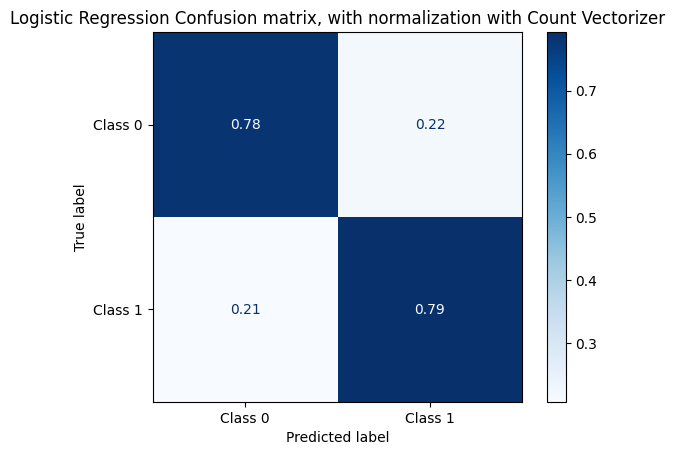

In [37]:
conf_mat = metrics.plot_confusion_matrix(lr, test_ft_set, y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
conf_mat.ax_.set_title('Logistic Regression Confusion matrix, with normalization with Count Vectorizer');

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(index_title, y_pred, y_true):
    score_dict = {}
    score_dict['accuracy'] = round(accuracy_score(y_true, y_pred),2)
    score_dict['precision'] = round(precision_score(y_true, y_pred),2)
    score_dict['recall'] = round(recall_score(y_true, y_pred),2)
    score_dict['f1_score'] = round(f1_score(y_true, y_pred),2)
    
    index = [index_title]
    
    df = pd.DataFrame(score_dict, index = index)
    
    return df

In [39]:
c_eval = evaluate('Count Vectorizer', y_pred, y_test)
c_eval 

,accuracy,precision,recall,f1_score
Count Vectorizer,0.79,0.77,0.79,0.78


In [40]:
feature_importance = lr.coef_[0][:10]
for i,v in enumerate(feature_importance):
    print('Feature: ', list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)], 'Score: ', v)

Feature:  aaron Score:  0.0
Feature:  abandon Score:  0.025284432061172226
Feature:  abbey Score:  0.0
Feature:  abbi Score:  0.0
Feature:  abduct Score:  0.0
Feature:  aber Score:  0.0
Feature:  abercrombi Score:  0.0
Feature:  abid Score:  0.0
Feature:  abigail Score:  0.0
Feature:  abil Score:  -0.03203133428731526


In [41]:
feature_importance = lr.coef_[0]
sorted_idx = np.argsort(feature_importance)

sorted_idx

array([2218,  214, 3882, ..., 4162, 1827, 5513])

Top 10 words contributing to the sentiment

In [42]:
# Top 10 words contributing to the negative sentiment
top_10_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)

['rt', 'dnf', 'miniseri', 'meh', 'audiblecom', 'unfortun', 'bore', 'ok', 'disappoint', 'wast']


In [43]:
# Top 10 words contributing to the positive sentiment
top_10_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
print(top_10_neg_w)

['excel', 'amaz', 'love', 'awesom', 'great', 'wow', 'fantast', 'glad', 'beauti', 'heartbreak']


In [44]:
test_review = cv.transform(["This was one of the best books I have ever read"])
lr.predict(test_review)

array([0])

In [45]:
pred_proba_df = pd.DataFrame(lr.predict_proba(test_ft_set))
threshold_list = [0.3,0.4,0.45,0.5]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_f1 = round(metrics.f1_score(y_test, Y_test_pred.loc[:,1].values),3)
    print('F1: {}'.format(test_f1))


******** For i = 0.3 ******
F1: 0.764

******** For i = 0.4 ******
F1: 0.784

******** For i = 0.45 ******
F1: 0.788

******** For i = 0.5 ******
F1: 0.781


In [46]:
start_time = time.time()
tfidf_v=TfidfVectorizer(use_idf=True,min_df = 10, max_df = 0.95)
tfidf_v.fit_transform(train['review_text'].values)
train_feature_set=tfidf_v.transform(train['review_text'].values)
test_feature_set=tfidf_v.transform(test['review_text'].values)
print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to convert text input into feature vector:  0.05  mins


In [47]:
start_time = time.time()
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Time takes to train model and make predictions:  0.0  mins
Accuracy:  0.808
F1:  0.8


In [48]:
# use Kfold model to test model accuracy 
kfold = KFold(n_splits=10)
results = cross_val_score(lr, tfidf_v.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')

print("Accuracy from each of 10 folds: ", results)
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy from each of 10 folds:  [0.81257485 0.79640719 0.82185629 0.81616766 0.79820359 0.80622941
 0.81132075 0.80622941 0.80772686 0.81251872]
Mean Accuracy: 80.892%, Standard Deviation: (0.734%)


In [49]:
# Hyperparameter Tuning
values = [.01, .1, 1, 10]
for val in values:
  kfold = KFold(n_splits=10) 
  lr_1 = LogisticRegression(C=val, random_state=42, max_iter = 2500) 
  results = cross_val_score(lr_1, tfidf_v.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')
  print("C Value :", val, 
        "Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % 
        (results.mean()*100.0, results.std()*100.0))

#  seems like the best accuracy is from C = 0.1

penalties = ['l1', 'l2']
for pen in penalties:
  kfold = KFold(n_splits=10) 
  lr_2 = LogisticRegression(penalty=pen,solver='liblinear') ##### This is the important line
  results = cross_val_score(lr_2, tfidf_v.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')
  print("Penalty :", pen, 
        "Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % 
        (results.mean()*100.0, results.std()*100.0))

# both give about the same so doesn't seem to really matter which we use
# now let's re-run logistic regression with better parameters

# similar results to the Count Vectorizer - since Tfidf is a little better, we will continue using that.

C Value : 0.01 Mean Accuracy: 76.973%, Standard Deviation: (1.052%)
C Value : 0.1 Mean Accuracy: 79.865%, Standard Deviation: (0.779%)
C Value : 1 Mean Accuracy: 80.892%, Standard Deviation: (0.734%)
C Value : 10 Mean Accuracy: 79.398%, Standard Deviation: (0.639%)
Penalty : l1 Mean Accuracy: 80.779%, Standard Deviation: (0.661%)
Penalty : l2 Mean Accuracy: 80.892%, Standard Deviation: (0.734%)


In [50]:
train_feature_set.shape[1]
cv.vocabulary_


{'arc': 331,
 'provid': 5085,
 'publish': 5101,
 'netgalley': 4387,
 'grip': 2831,
 'intens': 3350,
 'previous': 5001,
 'instal': 3331,
 'novella': 4465,
 'seri': 5719,
 'one': 4541,
 'drag': 1883,
 'multipl': 4283,
 'place': 4845,
 'heroin': 3010,
 'pretti': 4996,
 'annoy': 276,
 'hero': 3008,
 'present': 4983,
 'enough': 2103,
 'form': 2532,
 'opinion': 4560,
 'whole': 7167,
 'miscommun': 4173,
 'issu': 3427,
 'grew': 2822,
 'old': 4528,
 'main': 3947,
 'drug': 1913,
 'angl': 262,
 'also': 204,
 'progress': 5045,
 'much': 4274,
 'stori': 6205,
 'make': 3951,
 'appear': 313,
 'filler': 2410,
 'anyth': 300,
 'els': 2042,
 'still': 6187,
 'want': 7062,
 'quit': 5154,
 'miniseri': 4162,
 'realli': 5224,
 'know': 3635,
 'taylor': 6424,
 'regular': 5300,
 'someth': 6001,
 'nefari': 4365,
 'go': 2745,
 'bet': 623,
 'good': 2758,
 'steampunk': 6162,
 'aspect': 388,
 'seem': 5669,
 'far': 2332,
 'found': 2551,
 'book': 734,
 'read': 5211,
 'review': 5411,
 'opportun': 4561,
 'boy': 772,
 'gla

In [51]:
start_time = time.time()
lr = LogisticRegression(penalty= 'l2', random_state = 42, max_iter=1000,C=1)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Time takes to train model and make predictions:  0.01  mins
Accuracy:  0.808
F1:  0.8


In [52]:
t_eval = evaluate('TfIDF vectorizer', y_pred, y_test)
t_eval

pieces = (t_eval,c_eval)
score_df = pd.concat(pieces, ignore_index = False)

score_df = score_df.reset_index()

In [53]:
DeepnoteChart(score_df, """{"mark":{"type":"bar","tooltip":true},"$schema":"https://vega.github.io/schema/vega-lite/v4.json","encoding":{"x":{"sort":null,"type":"nominal","field":"index","scale":{"type":"linear","zero":false}},"y":{"bin":false,"sort":null,"type":"quantitative","field":"accuracy","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"quantitative","field":"accuracy","scale":{"type":"linear","zero":false}}},"height":440,"width":"container","config":{"background":"#ffffff","title":{"anchor":"start","color":"#000000","font":"Inter, sans-serif","fontSize":22,"fontWeight":"normal"},"area":{"fill":"#51C0E9"},"line":{"stroke":"#51C0E9","strokeWidth":2},"rect":{"fill":"#51C0E9"},"axis":{"labelFont":"Inter, sans-serif","labelFontSize":12,"labelFontWeight":"normal","titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold","labelOverlap":"greedy"},"legend":{"labelFont":"Inter, sans-serif","labelFontSize":12,"titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold"}}}""")

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


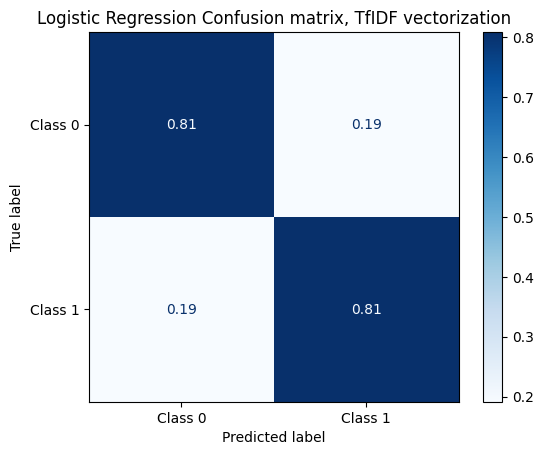

In [54]:
conf_mat = metrics.plot_confusion_matrix(lr, test_feature_set, y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='pred')
conf_mat.ax_.set_title('Logistic Regression Confusion matrix, TfIDF vectorization');

In [55]:
feature_importance = lr.coef_[0][:10]
for i,v in enumerate(feature_importance):
    print('Feature: ', list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)], 'Score: ', v)

Feature:  aaron Score:  0.11367260261164742
Feature:  abandon Score:  1.3118707789823745
Feature:  abbey Score:  -0.11984940704480979
Feature:  abbi Score:  -0.6384051592630525
Feature:  abduct Score:  0.04953738891080793
Feature:  aber Score:  0.45294249292700994
Feature:  abercrombi Score:  -0.615724092603095
Feature:  abid Score:  0.1847684664489756
Feature:  abigail Score:  0.803636305020366
Feature:  abil Score:  -1.158712112810794


In [56]:
feature_importance = lr.coef_[0]
sorted_idx = np.argsort(feature_importance)
top_10_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)
cv.vocabulary_.values()

['bore', 'rt', 'disappoint', 'unfortun', 'miniseri', 'lack', 'dnf', 'ok', 'suppos', 'meh']


dict_values([331, 5085, 5101, 4387, 2831, 3350, 5001, 3331, 4465, 5719, 4541, 1883, 4283, 4845, 3010, 4996, 276, 3008, 4983, 2103, 2532, 4560, 7167, 4173, 3427, 2822, 4528, 3947, 1913, 262, 204, 5045, 4274, 6205, 3951, 313, 2410, 300, 2042, 6187, 7062, 5154, 4162, 5224, 3635, 6424, 5300, 6001, 4365, 2745, 623, 2758, 6162, 388, 5669, 2332, 2551, 734, 5211, 5411, 4561, 772, 2722, 3929, 7128, 215, 762, 2431, 4713, 7049, 4403, 1228, 209, 2909, 451, 2418, 2697, 2945, 6089, 129, 1149, 3584, 2856, 891, 755, 6824, 5200, 4463, 1968, 5791, 632, 590, 5990, 2444, 2888, 576, 5198, 6687, 1933, 3434, 5146, 3872, 3355, 4905, 6538, 4693, 6282, 3922, 2366, 6313, 1925, 4346, 2289, 5477, 2776, 5114, 3829, 3290, 6513, 5748, 4344, 6122, 2219, 2721, 6478, 2845, 2191, 3799, 4824, 4267, 358, 715, 7245, 1267, 2195, 3352, 1327, 2412, 3083, 6582, 1391, 344, 4894, 5285, 2234, 3785, 3966, 5615, 1355, 1036, 4053, 539, 5553, 2005, 2372, 2452, 6495, 6236, 5148, 7250, 4335, 4697, 6526, 2374, 6928, 3031, 5703, 3424, 190

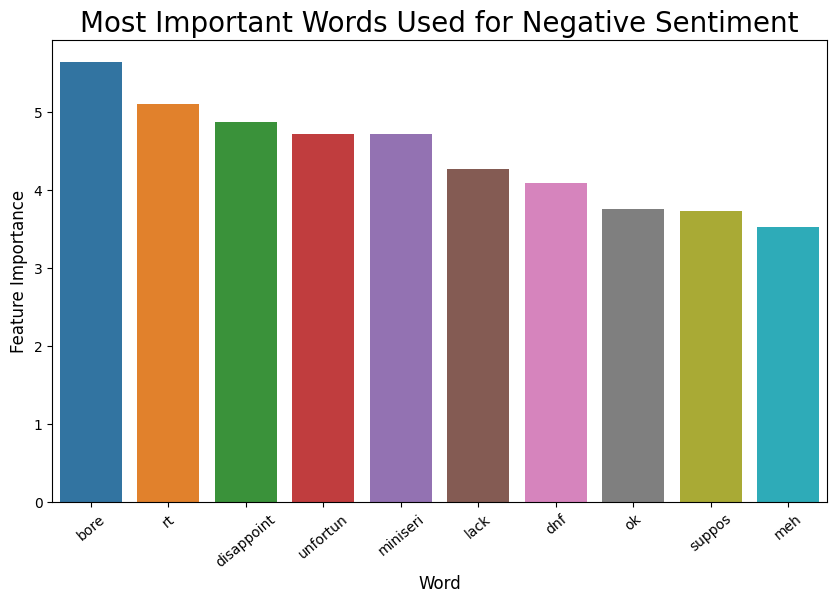

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_pos_w, y=feature_importance[sorted_idx[range(-1,-11, -1)]])
plt.title("Most Important Words Used for Negative Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

In [58]:
top_10_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
print(top_10_neg_w)

['love', 'great', 'amaz', 'heart', 'excel', 'put', 'enjoy', 'perfect', 'beauti', 'fantast']


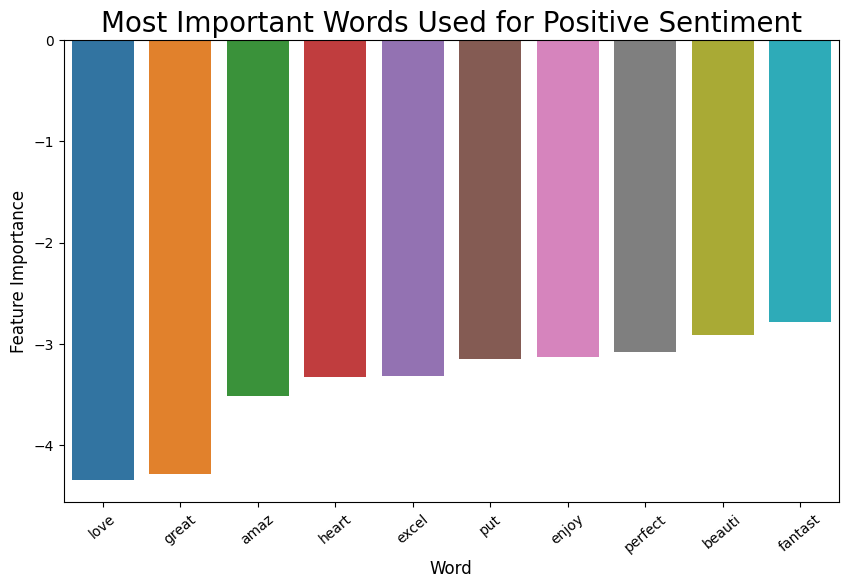

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_neg_w, y=feature_importance[sorted_idx[:10]])
plt.title("Most Important Words Used for Positive Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

# Naive Bayes

In [60]:
# start by importing all necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer,ToktokTokenizer
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer


Creating a sentiment analysis using the Naive Bayes 

In [61]:
#  let's start by checking the most common words in the reviews
comm_wrds_pos = Counter(" ".join(df_reviews[df_reviews['labels']== 0]['review_text']).\
                 split()).most_common(30)
comm_wrds_pos_df = pd.DataFrame.from_dict(comm_wrds_pos)

comm_wrds_pos_df

,0,1
0,star,70
1,love,52
2,"review,come",24
3,"love,book",19
4,httpwwwsegredosemlivroscom,16
5,amaz,14
6,awesom,11
7,"review,come,soon",10
8,"review,follow",10
9,httppussrebootspaircomblog,10


In [62]:
comm_wrds_neg = Counter(" ".join(df_reviews[df_reviews['labels']== 1]['review_text']).\
                 split()).most_common(30)
comm_wrds_neg_df = pd.DataFrame.from_dict(comm_wrds_neg)

comm_wrds_neg_df

,0,1
0,"amazon,freebi",68
1,dnf,48
2,fals,44
3,"review,come",34
4,meh,27
5,star,24
6,httplibrarianosnarkblogspotcom,18
7,edit,13
8,love,13
9,novel,12


In [63]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_reviews,test_size=0.3,stratify=df_reviews['labels'],random_state=42)
train

,labels,review_text
43891,1,"arc,provid,publish,netgalley,grip,intens,previ..."
5726,1,"steampunki,good,steampunk,aspect,seem,wallpap,..."
40480,0,"found,book,read,review,opportun,boy,glad,book,..."
28657,0,"clever,keep,guess,buy,borrow,itbut,read"
18951,0,"unexpect,raunchi,novel,easili,shock,bewar"
...,...,...
19488,0,"love,read,hawk,jase,cours"
1840,1,"hung,disappoint,unclimact,end"
7998,1,"care,book,mrs,bird,one,bossi,ladi,rather,rude,..."
10628,0,"ador,book,review,come"


In [64]:
import time
from sklearn.feature_extraction.text import CountVectorizer
start = time.time()
cv = CountVectorizer(binary=True, min_df=10,max_df=0.95)
cv.fit_transform(train['review_text'].values)

train_ft_set = cv.transform(train['review_text'].values)
test_ft_set = cv.transform(test['review_text'].values)

print("Time took to convert text into vector: ", round((time.time() - start)/60,2), " mins")

Time took to convert text into vector:  0.05  mins


In [65]:
y_train = train['labels'].values
y_test = test['labels'].values

In [66]:
from sklearn.naive_bayes import MultinomialNB
start_time = time.time()
nb = MultinomialNB()
nb.fit(train_ft_set,y_train)
y_pred = nb.predict(test_ft_set)
print("Time took to train and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

Time took to train and make predictions:  0.0  mins


In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("Accuracy: ",round(accuracy_score(y_test,y_pred),3))
print("F1: ",round(f1_score(y_test, y_pred),3))

Accuracy:  0.791
F1:  0.781


In [68]:
kfold = KFold(n_splits=10)
results = cross_val_score(nb, cv.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')

print("Accuracy from each of 10 folds: ", results)
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy from each of 10 folds:  [0.79371257 0.79011976 0.80508982 0.79221557 0.78083832 0.79784367
 0.79095538 0.79754417 0.79245283 0.80413297]
Mean Accuracy: 79.449%, Standard Deviation: (0.674%)


In [69]:
alpha = [0, .2, .4, .6, .8, 1]
for a in alpha:
  kfold = KFold(n_splits=10) 
  nb_1 = MultinomialNB(alpha=a) 
  results = cross_val_score(nb_1, cv.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')
  print("Alpha:", a, 
        "Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % 
        (results.mean()*100.0, results.std()*100.0))
# about the same alpha, and lower accuracy than logistic regression model

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: Use

In [70]:
cnb_eval = evaluate('Count Vectorizer', y_pred, y_test)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


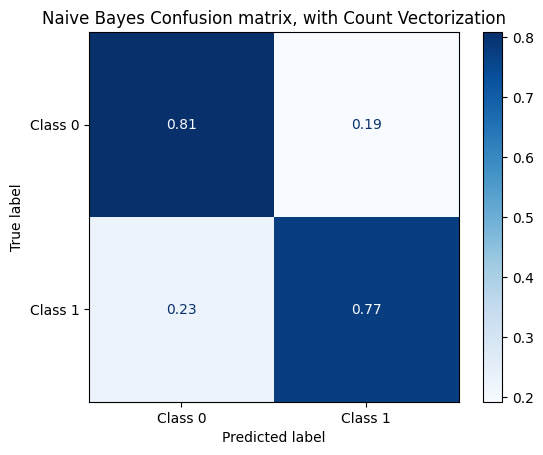

In [71]:
from sklearn import metrics

conf_mat = metrics.plot_confusion_matrix(nb, test_ft_set, y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
conf_mat.ax_.set_title('Naive Bayes Confusion matrix, with Count Vectorization');

In [72]:
# let's try with tfidf vectorizer

start_time = time.time()
tfidf_v=TfidfVectorizer(use_idf=True,min_df = 10, max_df = 0.95)
tfidf_v.fit_transform(train['review_text'].values)
train_feature_set=tfidf_v.transform(train['review_text'].values)
test_feature_set=tfidf_v.transform(test['review_text'].values)
print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to convert text input into feature vector:  0.05  mins


In [73]:
nb = MultinomialNB()
nb.fit(train_feature_set,y_train)
y_pred = nb.predict(test_feature_set)
print("Time took to train and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

Time took to train and make predictions:  0.05  mins


In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("Accuracy: ",round(accuracy_score(y_test,y_pred),3))
print("F1: ",round(f1_score(y_test, y_pred),3))

Accuracy:  0.793
F1:  0.774


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


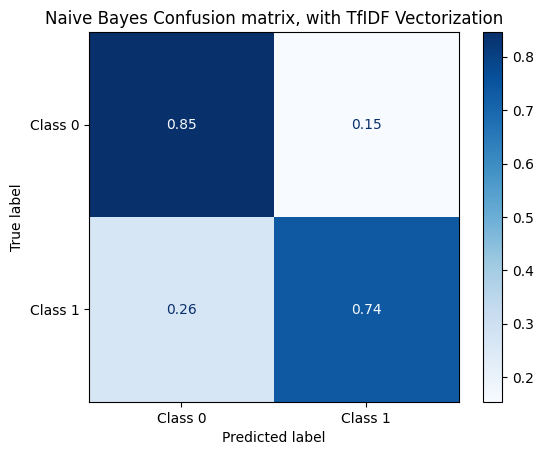

In [75]:
conf_mat = metrics.plot_confusion_matrix(nb, test_feature_set, y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
conf_mat.ax_.set_title('Naive Bayes Confusion matrix, with TfIDF Vectorization');

In [76]:
tnb_eval = evaluate('TfIDF Vectorizer', y_pred, y_test)
tnb_eval

pieces = (tnb_eval,cnb_eval)
score_df_nb = pd.concat(pieces, ignore_index = False)

score_df_nb = score_df_nb.reset_index()

score_df_nb

,index,accuracy,precision,recall,f1_score
0,TfIDF Vectorizer,0.79,0.82,0.74,0.77
1,Count Vectorizer,0.79,0.79,0.77,0.78


In [77]:
kfold = KFold(n_splits=10)
results = cross_val_score(nb, tfidf_v.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')

print("Accuracy from each of 10 folds: ", results)
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy from each of 10 folds:  [0.79041916 0.78982036 0.80299401 0.79491018 0.78473054 0.79694519
 0.79215334 0.79155436 0.79844265 0.80173705]
Mean Accuracy: 79.437%, Standard Deviation: (0.542%)


In [78]:
alpha = [0, .2, .4, .6, .8, 1]
for a in alpha:
  kfold = KFold(n_splits=10) 
  nb_1 = MultinomialNB(alpha=a) 
  results = cross_val_score(nb_1, tfidf_v.transform(df_reviews['review_text'].values),df_reviews.labels, cv=kfold, scoring='accuracy')
  print("Alpha:", a, 
        "Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % 
        (results.mean()*100.0, results.std()*100.0))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: Use

In [79]:
feature_importance = nb.feature_log_prob_[0][:10]
for i,v in enumerate(feature_importance):
    print('Feature: ', list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)], 'Score: ', v)

Feature:  aaron Score:  -9.42604308683771
Feature:  abandon Score:  -9.20583398990299
Feature:  abbey Score:  -9.891804041073822
Feature:  abbi Score:  -8.660929628776143
Feature:  abduct Score:  -9.805268740845836
Feature:  aber Score:  -10.828577667694693
Feature:  abercrombi Score:  -9.684195854028216
Feature:  abid Score:  -10.638362793496126
Feature:  abigail Score:  -10.682678437504357
Feature:  abil Score:  -8.059146221828627


In [80]:
feature_importance = nb.feature_log_prob_[0]
sorted_idx = np.argsort(feature_importance)

sorted_idx

array([3080, 1829,  774, ..., 5211, 3882,  734])

In [81]:
top_10_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)

['book', 'love', 'read', 'stori', 'one', 'like', 'seri', 'great', 'realli', 'charact']


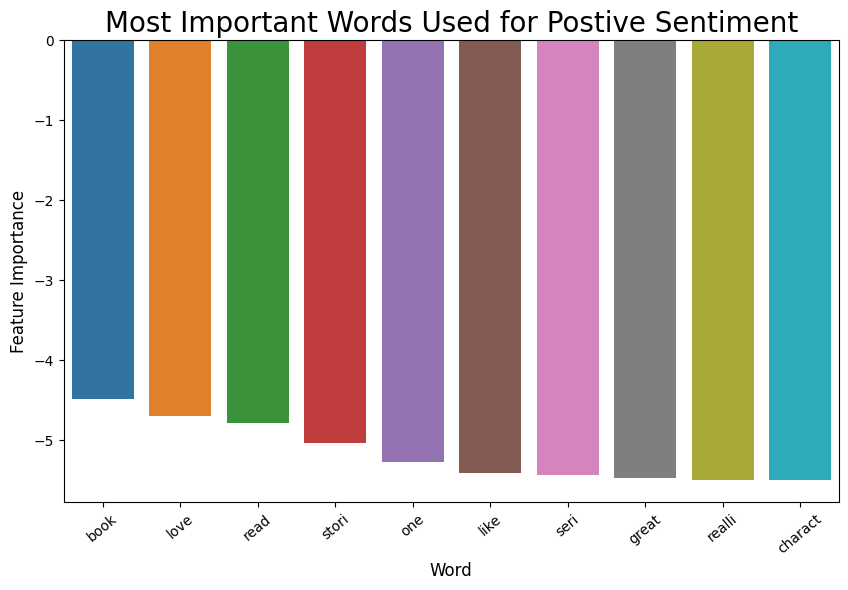

In [82]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_pos_w, y =feature_importance[sorted_idx[range(-1,-11, -1)]])
plt.title("Most Important Words Used for Postive Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

In [83]:
top_10_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
print(top_10_neg_w)

['homophob', 'dnfed', 'bplus', 'bloat', 'dnfd', 'preposter', 'amateurish', 'flimsi', 'writ', 'inaccur']


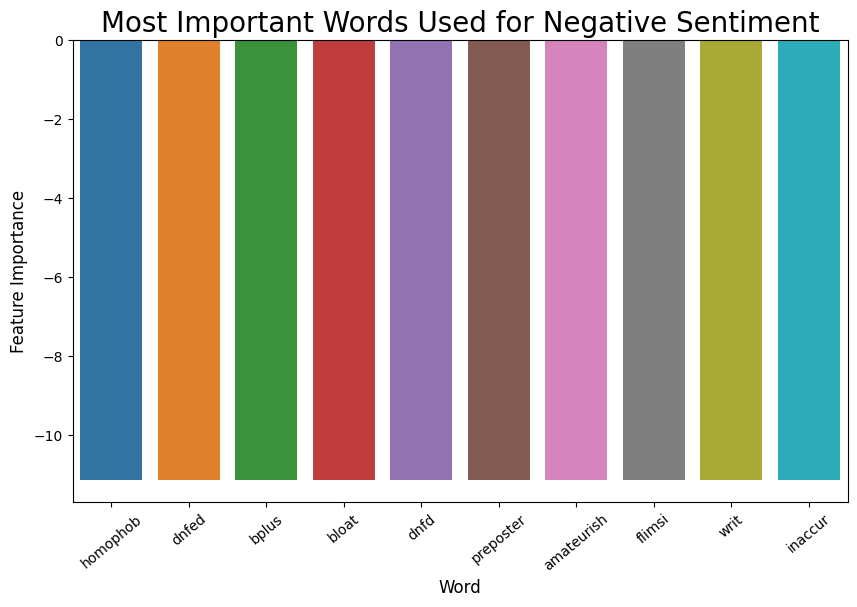

In [84]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_neg_w, y=feature_importance[sorted_idx[:10]])
plt.title("Most Important Words Used for Negative Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

In [85]:
score_df

,index,accuracy,precision,recall,f1_score
0,TfIDF vectorizer,0.81,0.81,0.79,0.80
1,Count Vectorizer,0.79,0.77,0.79,0.78


# Failure Analysis on NB

In [86]:
#  take a random sample of reviews from the entire dataset

df.head(20)

test_data = df[df.rating != 3]

test_data = test_data.dropna()

test_data = test_data.sample(5000)

test_data = test_data[['review_text','sentiment','rating']]

test_data = test_data.reset_index(drop= True)

test_data['labels'] = test_data['rating'].apply(lambda x:1 if x < 3 else 0)
test_data

,review_text,sentiment,rating,labels
0,"A quick, easy, entertaining read. Just what I ...",good,4,0
1,Loved this as much as the first! Really hoping...,good,4,0
2,Not really for me.,bad,0,1
3,This haunting novel felt so raw and real that ...,good,5,0
4,I was let down. It was a great 'teaser' but I ...,bad,2,1
...,...,...,...,...
4995,"If Not Now, When offers a realistic fictional ...",good,4,0
4996,*** Copy provided to Bayou Book Junkie in exch...,good,5,0
4997,Was anyone else a bit disgusted by Luke's beha...,bad,2,1
4998,Find all of my reviews at: http://52bookminimu...,good,4,0


In [87]:
# run Predictions
X_ft_set = tfidf_v.transform(test_data['review_text'].values)

y_f_pred = nb.predict(X_ft_set)

y_f_pred = pd.DataFrame(y_f_pred)

test_data = test_data.join(y_f_pred)
test_data

,review_text,sentiment,rating,labels,0
0,"A quick, easy, entertaining read. Just what I ...",good,4,0,1
1,Loved this as much as the first! Really hoping...,good,4,0,0
2,Not really for me.,bad,0,1,0
3,This haunting novel felt so raw and real that ...,good,5,0,0
4,I was let down. It was a great 'teaser' but I ...,bad,2,1,0
...,...,...,...,...,...
4995,"If Not Now, When offers a realistic fictional ...",good,4,0,0
4996,*** Copy provided to Bayou Book Junkie in exch...,good,5,0,1
4997,Was anyone else a bit disgusted by Luke's beha...,bad,2,1,0
4998,Find all of my reviews at: http://52bookminimu...,good,4,0,0


In [88]:
test_data[0] = test_data[0].replace(0,'good')

test_data[0] = test_data[0].replace(1,'bad')

In [89]:
test_data = test_data.rename({0: 'Predicted Sentiment'}, axis='columns')
test_data

,review_text,sentiment,rating,labels,Predicted Sentiment
0,"A quick, easy, entertaining read. Just what I ...",good,4,0,bad
1,Loved this as much as the first! Really hoping...,good,4,0,good
2,Not really for me.,bad,0,1,good
3,This haunting novel felt so raw and real that ...,good,5,0,good
4,I was let down. It was a great 'teaser' but I ...,bad,2,1,good
...,...,...,...,...,...
4995,"If Not Now, When offers a realistic fictional ...",good,4,0,good
4996,*** Copy provided to Bayou Book Junkie in exch...,good,5,0,bad
4997,Was anyone else a bit disgusted by Luke's beha...,bad,2,1,good
4998,Find all of my reviews at: http://52bookminimu...,good,4,0,good


In [90]:
y_ftest = test_data['labels'].values

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


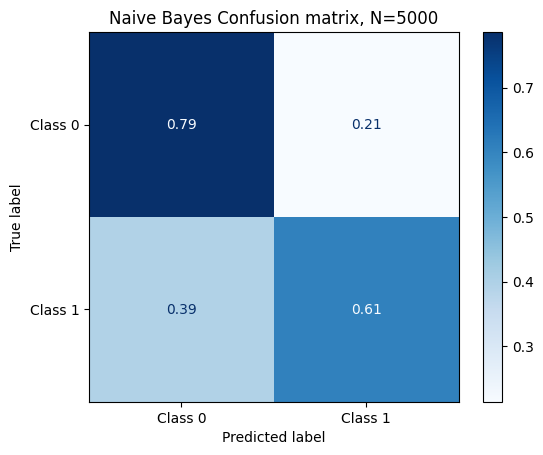

In [91]:
conf_mat = metrics.plot_confusion_matrix(nb, X_ft_set, y_ftest,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
conf_mat.ax_.set_title('Naive Bayes Confusion matrix, N=5000');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d88850fe-1254-48df-812c-7b92bc9ba01d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>